In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('house prediction_train.csv')

In [3]:
dataset.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
dataset = dataset.drop(['Id'], axis=1)

In [5]:
#dataset cleaning and preparation
#dataset insights and understanding


In [6]:
dataset_2 = dataset

In [7]:
null_columns = dataset.columns[dataset.isnull().any()] 

In [8]:
dataset[null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [9]:
dataset.isnull()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False


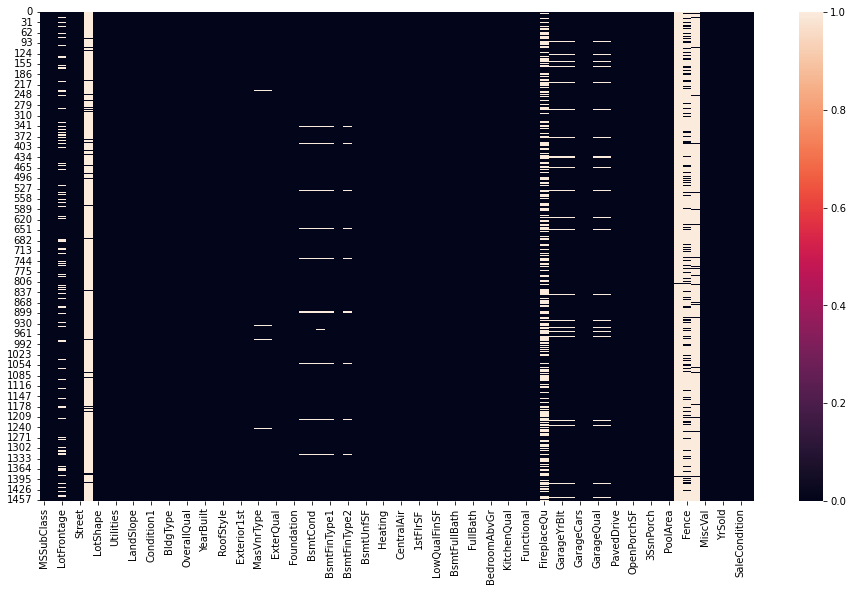

In [10]:
# heatmap showing null values

plt.figure(figsize=(16,9))
sns.heatmap(dataset.isnull())
plt.show()

In [11]:
dataset.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [12]:
null_count =  dataset[null_columns].isnull().sum() 

In [13]:
null_count

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [14]:
def delete_null_features(dataset, null_percentage):
    if(dataset.isnull().values.any()):
        null_columns = dataset.columns[dataset.isnull().any()]
        null_count = dataset[null_columns].isnull().sum() 
        
        for column in null_columns:
            if(null_count[column] >= null_percentage * len(dataset)):
                dataset = dataset.drop([column], axis=1)
            else:
                continue
        return dataset
    else:
        return dataset


In [15]:
def fill_null_values(dataset):
    
    if(dataset.isnull().values.any()): 
        cat_features = dataset.select_dtypes(include='object').columns # categorical features
        cont_features = dataset.select_dtypes(include=['int', 'float']).columns # continuous features
    
        for (cat_feature, cont_feature) in zip(cat_features, cont_features):
            dataset[cat_feature] = dataset[cat_feature].fillna(dataset[cat_feature].mode()[0]) # fill null values with mode
            dataset[cont_feature] = dataset[cont_feature].fillna(dataset[cont_feature].mean()) # fill null values with mean
        return dataset

            
    else:
        return dataset

In [16]:
new_dataset = delete_null_features(dataset=dataset, null_percentage=0.8)

In [17]:
new_dataset = fill_null_values(new_dataset)

In [18]:
new_dataset.to_excel('cleaned_dataset.xlsx')

<AxesSubplot:title={'center':'Correlation btn features and target'}>

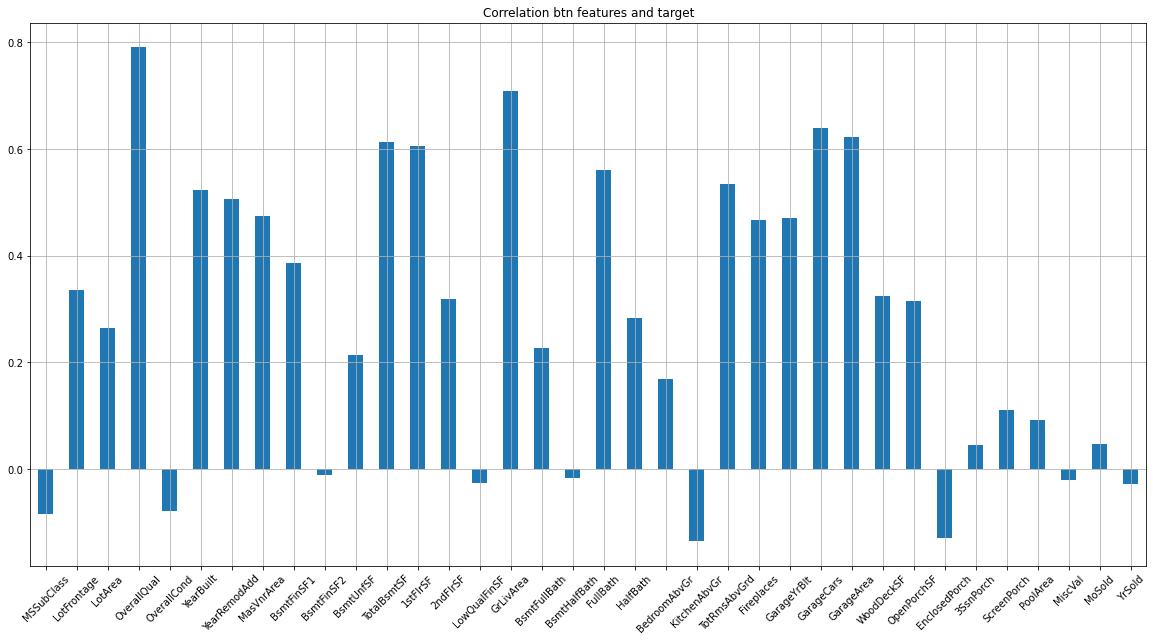

In [19]:
features = new_dataset.drop(['SalePrice'], axis=1)
features.corrwith(new_dataset['SalePrice']).plot.bar(
    figsize=(20,10), title = 'Correlation btn features and target', rot=45, grid=True
)


In [20]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [21]:
def one_hot_encode(data,feature,keep_first=True):

    oh = OneHotEncoder()
   
    oh_df = pd.DataFrame(oh.fit_transform(data[[feature]]).toarray()) 
    
    oh_df.columns = oh.get_feature_names()
    
    for col in oh_df.columns:
        oh_df.rename({col:f'{feature}_'+col.split('_')[1]},axis=1,inplace=True)
    
    new_data = pd.concat([data,oh_df],axis=1)
    new_data.drop(feature,axis=1,inplace=True)
    
    if keep_first == False:
        new_data=new_data.iloc[:,1:]
    
    return new_data

In [22]:
def scale_feature(data,feature):
    scaler = StandardScaler()
    scaled_df = pd.DataFrame(scaler.fit_transform(data[[feature]]), columns=[f'scaled_{feature}'])
    
    new_data = pd.concat([data,scaled_df], axis=1).drop([feature], axis=1)
    return new_data
    

In [23]:
continuous_features = new_dataset.select_dtypes(include=['int', 'float'])

In [24]:
categorical_features = new_dataset.select_dtypes(include='object')

In [25]:
for column in categorical_features.columns:
    categorical_features = one_hot_encode(categorical_features, column)
    

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_fea

In [26]:
categorical_features

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
for column in continuous_features.columns:
    continuous_features = scale_feature(continuous_features, column)

In [28]:
continuous_features

,scaled_MSSubClass,scaled_LotFrontage,scaled_LotArea,scaled_OverallQual,scaled_OverallCond,scaled_YearBuilt,scaled_YearRemodAdd,scaled_MasVnrArea,scaled_BsmtFinSF1,scaled_BsmtFinSF2,...,scaled_WoodDeckSF,scaled_OpenPorchSF,scaled_EnclosedPorch,scaled_3SsnPorch,scaled_ScreenPorch,scaled_PoolArea,scaled_MiscVal,scaled_MoSold,scaled_YrSold,scaled_SalePrice
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,...,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,...,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,...,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,...,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.515281
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,...,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.869843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.365633,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.574410,-0.973018,-0.288653,...,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439,-0.074560
1456,-0.872563,0.679039,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084843,0.759659,0.722112,...,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210,0.366161
1457,0.309859,-0.183951,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.574410,-0.369871,-0.288653,...,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210,1.077611
1458,-0.872563,-0.093110,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.574410,-0.865548,6.092188,...,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210,-0.488523


In [29]:
new_dataset = pd.concat([continuous_features, categorical_features], axis=1)

In [30]:
features = new_dataset.drop(['scaled_SalePrice'], axis=1)
target = new_dataset[['scaled_SalePrice']]

In [31]:
features

,scaled_MSSubClass,scaled_LotFrontage,scaled_LotArea,scaled_OverallQual,scaled_OverallCond,scaled_YearBuilt,scaled_YearRemodAdd,scaled_MasVnrArea,scaled_BsmtFinSF1,scaled_BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.365633,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.574410,-0.973018,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,-0.872563,0.679039,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084843,0.759659,0.722112,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.309859,-0.183951,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.574410,-0.369871,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,-0.872563,-0.093110,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.574410,-0.865548,6.092188,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
target = target.values.ravel() # making the target a 1-D array 

In [33]:
from sklearn.model_selection import train_test_split

feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [34]:
feature_test

,scaled_MSSubClass,scaled_LotFrontage,scaled_LotArea,scaled_OverallQual,scaled_OverallCond,scaled_YearBuilt,scaled_YearRemodAdd,scaled_MasVnrArea,scaled_BsmtFinSF1,scaled_BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
892,-0.872563,-0.002269,-0.210750,-0.071836,2.179628,-0.273836,0.878668,-0.574410,0.481115,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1105,0.073375,1.269506,0.174303,1.374795,-0.517200,0.752907,0.491040,1.431049,1.290428,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
413,-0.636078,-0.638156,-0.156028,-0.795151,0.381743,-1.466183,-1.689368,-0.574410,-0.973018,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
522,-0.163109,-0.910680,-0.552908,-0.071836,1.280685,-0.803768,-1.689368,-0.574410,-0.097907,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1036,-0.872563,0.860721,0.238646,2.098110,-0.517200,1.183477,1.120936,-0.186614,1.268496,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,-0.872563,-0.002269,-0.234603,-0.795151,0.381743,-0.439440,0.345679,-0.574410,0.882482,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
323,-0.872563,-0.956100,-0.470726,-2.241782,2.179628,-0.538802,0.975575,-0.574410,-0.411543,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
650,0.073375,-0.229372,-0.239714,0.651479,0.381743,1.183477,1.072482,0.000000,-0.973018,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
439,-0.163109,-0.138531,0.184125,-0.071836,2.179628,-1.698028,0.733308,-0.574410,-0.973018,-0.288653,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
#svm model
from sklearn.svm import SVR

svm = SVR()

svm.fit(feature_train, target_train)

SVR()

In [36]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def calculate_metrics(expected_values, predicted_values):
    evaluation = pd.DataFrame([{'r2':r2_score(expected_values, predicted_values),
                  'MAE':mean_absolute_error(expected_values, predicted_values),
                 'RMSE': np.sqrt(mean_squared_error(expected_values, predicted_values))}])
    return evaluation

In [37]:
predicted_values = svm.predict(feature_test)

In [38]:
svm_performance_measure = calculate_metrics(target_test, predicted_values)

In [39]:
svm_performance_measure

,r2,MAE,RMSE
0,0.854724,0.214247,0.400923


In [40]:
# linear regression model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(feature_train, target_train)

LinearRegression()

In [41]:
predicted_values = lr.predict(feature_test)

In [42]:
lr_performance_measure = calculate_metrics(target_test, predicted_values)

In [43]:
lr_performance_measure

,r2,MAE,RMSE
0,-4.891674e+18,1.785918e+08,2.326446e+09


In [44]:
# RF model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(feature_train, target_train)

RandomForestRegressor()

In [45]:
predicted_values = rf.predict(feature_test)
rf_performance_measure = calculate_metrics(target_test, predicted_values)

In [46]:
rf_performance_measure

,r2,MAE,RMSE
0,0.890221,0.217057,0.348518


In [47]:
# randomized grid search for best random forest hyperparameters

from sklearn.model_selection import RandomizedSearchCV

best_rf = RandomForestRegressor(random_state=42)
n_estimators = range(10,501,10)
max_samples = range(100,500,50)
max_features = ['auto', 'sqrt', 'log2']
min_samples_split = [2, 5, 10, 15, 20]
min_samples_leaf = [1, 2, 5, 10, 15]

parameters = {
    'n_estimators': n_estimators,
    
    'max_samples': max_samples,
    
    'max_features': max_features,
    
    'min_samples_split': min_samples_split,
    
    'min_samples_leaf': min_samples_leaf
    
}

In [48]:
random_search = RandomizedSearchCV(best_rf, parameters, scoring='neg_mean_squared_error',
                           n_jobs=-2, verbose=3)



In [49]:
random_search.fit(feature_train, target_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42), n_jobs=-2,
                   param_distributions={'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_samples': range(100, 500, 50),
                                        'min_samples_leaf': [1, 2, 5, 10, 15],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': range(10, 501, 10)},
                   scoring='neg_mean_squared_error', verbose=3)

In [50]:
best_rf = random_search.best_estimator_

In [51]:
best_rf.fit(feature_train, target_train)

RandomForestRegressor(max_features='sqrt', max_samples=450, min_samples_leaf=5,
                      min_samples_split=20, n_estimators=440, random_state=42)

In [52]:

predicted_values = best_rf.predict(feature_test)
best_rf_performance_measure = calculate_metrics(target_test, predicted_values)

In [53]:
best_rf_performance_measure

,r2,MAE,RMSE
0,0.786579,0.274292,0.48594


## Conclusion

Since the random search gave us worse results as compared to the default values, the default random forest regressor instance will be retained.

In [54]:
from joblib import Parallel, delayed
import joblib
  
saved_model = rf
file_name = 'House_Price_Prediction_RF_model.pkl'

joblib.dump(saved_model, file_name) # Save the model as a pickle in a file
  

['House_Price_Prediction_RF_model.pkl']